In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [2]:
with open('DataWrangling/df_features_train.pickle', 'rb') as f:
    df_train = pickle.load(f)

df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_110-108-075,0,-333.519135,2.933824,-36.707424,30.884054,-28.997353,20.344494,-0.293386,15.807535,8.547583,...,0.228231,0.177406,0.149816,0.132034,0.343041,0.227495,0.122923,0.122777,0.115667,0
bass_synthetic_109-065-025,1,-621.176147,4.177383,0.452753,1.282601,-0.882964,-0.076867,-0.789888,0.027981,-0.666479,...,0.282951,0.280331,0.264468,0.233711,0.216045,0.228844,0.249875,0.239203,0.229569,0
bass_synthetic_055-107-050,0,-521.551941,-11.754347,-3.858067,20.784029,-14.809525,7.784602,12.068498,-12.896134,6.200492,...,0.056946,0.108375,0.116438,0.113959,0.053517,0.002848,0.001086,0.001086,0.819254,0
bass_synthetic_084-012-050,0,-406.293274,69.002266,44.043430,29.855034,27.764938,26.789261,23.259752,19.822796,17.532284,...,0.014752,0.061106,0.008868,0.042719,0.283062,0.002687,0.002474,0.010247,0.046735,0
bass_synthetic_000-039-100,1,-436.961884,42.321121,27.762300,19.082150,14.107945,11.303624,9.493841,8.715858,7.970356,...,0.844893,0.302405,0.065063,0.029362,0.038805,0.053596,0.005832,0.038143,0.039965,0


In [3]:
df_train.shape

(50000, 167)

In [4]:
with open('DataWrangling/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865784,46.664146,34.379803,24.787596,17.420424,10.198802,4.609534,1.380600,-1.023339,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298916,-3.689526,6.295265,8.093065,10.283859,6.089182,2.495068,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546825,2.895079,-12.039842,-12.553241,-11.451954,-12.535439,-20.456728,-19.256971,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089418,-50.149685,-16.565741,-29.849133,-16.627388,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826508,19.884623,-29.598238,-21.321136,-18.308319,-9.495083,7.672036,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [5]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

# Naive Bayes

In [6]:
#instantiate the classifier
clf_NB = GaussianNB()

#fit to training data
clf_NB.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred_NB = clf_NB.predict(X_test)

In [8]:
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 13.21%


In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [10]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.0059312  0.03321471 0.         0.01779359 0.30604982 0.03440095
  0.         0.02372479 0.54211151 0.03677343]
 [0.01858736 0.30111524 0.         0.01115242 0.02973978 0.21933086
  0.00371747 0.00743494 0.36431227 0.04460967]
 [0.02222222 0.26666667 0.10555556 0.01111111 0.20555556 0.02777778
  0.00555556 0.09444444 0.26111111 0.        ]
 [0.00153374 0.18404908 0.01533742 0.01840491 0.09509202 0.00920245
  0.00306748 0.01993865 0.65337423 0.        ]
 [0.00130548 0.12140992 0.         0.0078329  0.05091384 0.01305483
  0.         0.00261097 0.80287206 0.        ]
 [0.         0.03465347 0.         0.         0.04950495 0.0049505
  0.0049505  0.         0.88613861 0.01980198]
 [0.00996016 0.40438247 0.05378486 0.02589641 0.16733068 0.0059761
  0.11553785 0.03386454 0.14741036 0.03585657]
 [0.00425532 0.45957447 0.01702128 0.         0.00851064 0.
  0.01276596 0.01276596 0.48510638 0.        ]
 [0.         0.08823529 0.         0.         0.04575163 0.009

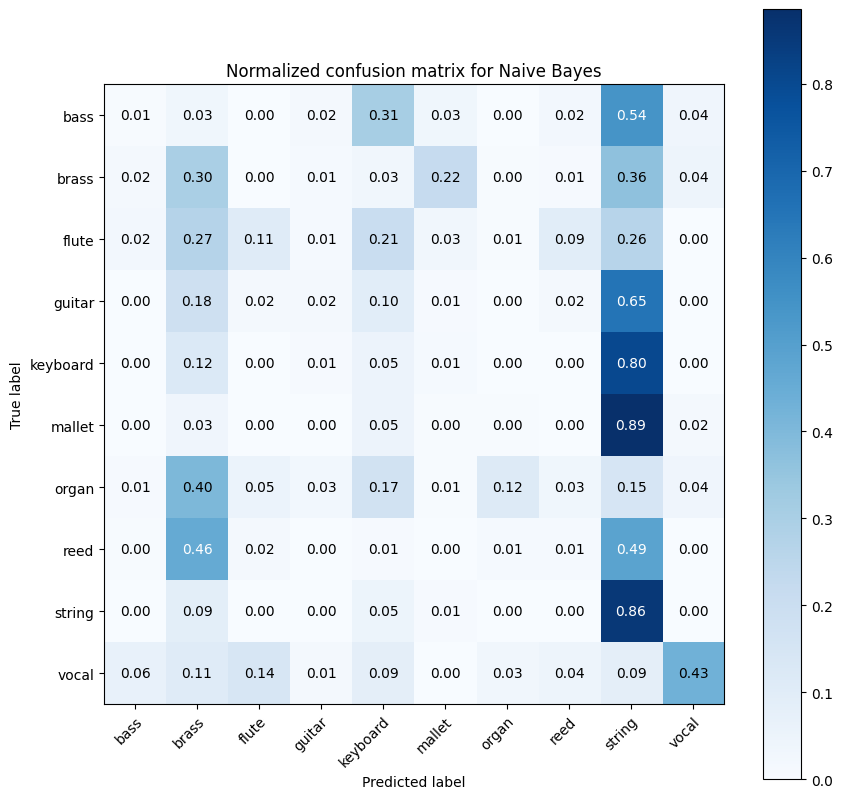

In [11]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('ConfusionMatrix/NB_normalized.png')

# Random Forests

In [12]:
#instantiate the random forest
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [13]:
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [14]:
y_pred_RF = clf_Rf.predict(X_test)

In [15]:
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 57.13%


Normalized confusion matrix
[[0.61328588 0.         0.00355872 0.07710558 0.11150652 0.15065243
  0.02016607 0.01542112 0.         0.00830368]
 [0.02973978 0.65055762 0.03717472 0.05204461 0.         0.00371747
  0.         0.04460967 0.00371747 0.17843866]
 [0.06111111 0.         0.71666667 0.01666667 0.03888889 0.05
  0.03333333 0.03333333 0.         0.05      ]
 [0.20705521 0.00766871 0.00920245 0.5        0.19171779 0.07055215
  0.00920245 0.00306748 0.00153374 0.        ]
 [0.18929504 0.01436031 0.0078329  0.20496084 0.47258486 0.06657963
  0.0156658  0.00261097 0.01827676 0.0078329 ]
 [0.12871287 0.02970297 0.0049505  0.08415842 0.15346535 0.58910891
  0.         0.00990099 0.         0.        ]
 [0.08964143 0.02988048 0.05378486 0.00199203 0.02390438 0.04581673
  0.56972112 0.06374502 0.02191235 0.09960159]
 [0.05531915 0.31489362 0.06808511 0.04255319 0.01276596 0.00425532
  0.         0.38297872 0.10638298 0.01276596]
 [0.05882353 0.00653595 0.         0.05882353 0.03594771 0

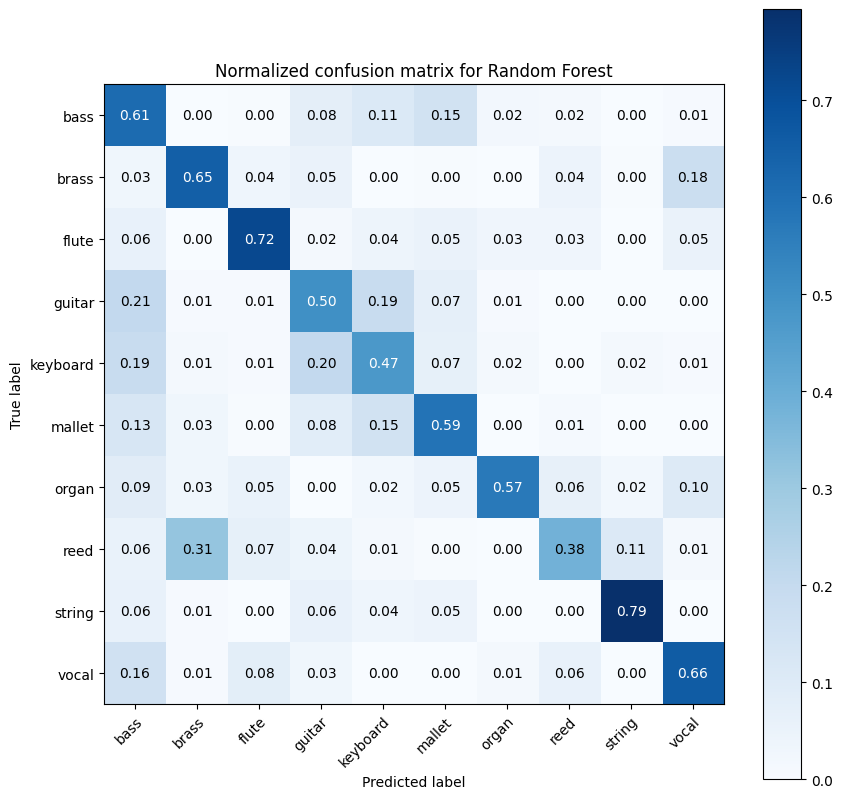

In [16]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('ConfusionMatrix/RF_Normalized.png')

## Grid Search

In [17]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
param_dist = {"n_estimators" : [20, 40, 60, 80],
              "max_depth": [10, 20, 30, 40],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [19]:
#instantiate a new random forest
clf_RF_CV=RandomForestClassifier()

#set number of iterations
n_iter_search = 20
#creat the random search class
random_search_RF = RandomizedSearchCV(clf_RF_CV, param_distributions=param_dist,
                                      n_iter=n_iter_search, cv=5)
#
random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78047e14bd90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78047f5777c0>,
                                        'n_estimators': [20, 40, 60, 80]})

In [20]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest is 60.72%


Normalized confusion matrix
[[0.61565836 0.         0.         0.06524318 0.10794781 0.18505338
  0.01067616 0.01423488 0.         0.00118624]
 [0.18215613 0.69888476 0.02230483 0.02973978 0.02973978 0.
  0.         0.01486989 0.         0.02230483]
 [0.01111111 0.         0.76111111 0.         0.01666667 0.04444444
  0.11666667 0.02222222 0.         0.02777778]
 [0.16104294 0.         0.00613497 0.52147239 0.24386503 0.05828221
  0.00920245 0.         0.         0.        ]
 [0.15796345 0.0078329  0.00261097 0.21279373 0.54438642 0.04699739
  0.01436031 0.         0.0078329  0.00522193]
 [0.09405941 0.0049505  0.         0.03960396 0.22772277 0.62871287
  0.0049505  0.         0.         0.        ]
 [0.0876494  0.01195219 0.05179283 0.00199203 0.04183267 0.04780876
  0.57768924 0.05776892 0.02988048 0.09163347]
 [0.01276596 0.31489362 0.10638298 0.05106383 0.         0.
  0.         0.39574468 0.10212766 0.01702128]
 [0.03921569 0.00326797 0.         0.02287582 0.         0.0130719
 

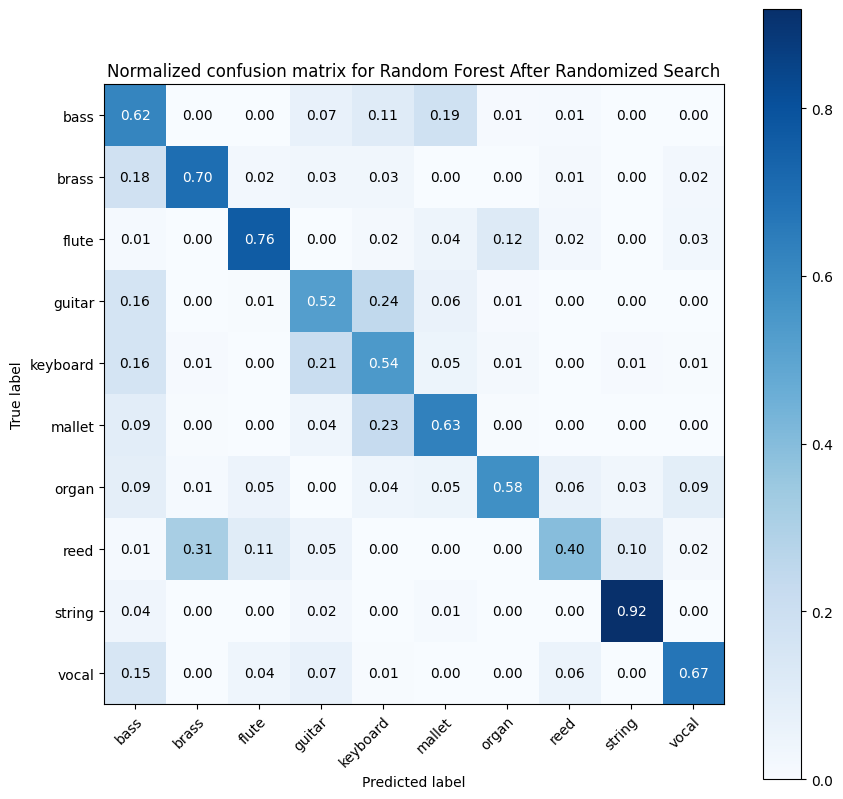

In [21]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest After Randomized Search')
plt.savefig('ConfusionMatrix/RF_Normalized_RandomSearch.png')

In [22]:
random_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features=9, n_estimators=80)

In [24]:
# pickle the trained model
with open("SavedModels/random_search_RF.pickle", mode='wb') as file:
    pickle.dump(random_search_RF, file)

# SVM

In [25]:
#instantiate the sclaer
scaler = MinMaxScaler()

In [26]:
#scale the feature space
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [27]:
#instatiate the  classifier
clf_svm = SVC(C=0.1)

In [28]:
clf_svm.fit(X_train_scale, y_train)

SVC(C=0.1)

In [29]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

/home/zaibachkhoa/Documents/Music-Genre-Classification-From-Audio-Files/NSynth/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 3.44%


In [30]:
#display non normalized confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 843],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 269],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 652],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 766],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 202],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 502],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 235],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 306],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 141]])

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


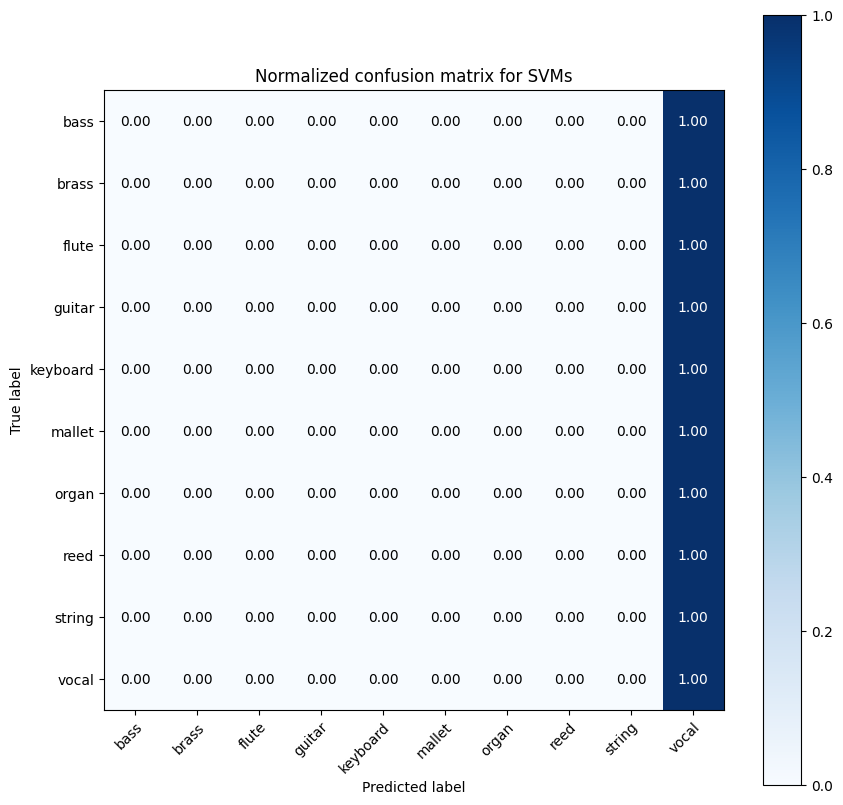

In [31]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('ConfusionMatrix/SVM_Normalized.png')